In [20]:
from sklearn import datasets
ds_digits = datasets.load_digits()

In [21]:
ds_digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [22]:
print(ds_digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


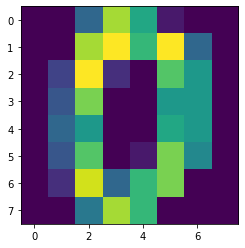

In [23]:
import matplotlib.pyplot as plt
plt.imshow(ds_digits.data[0].reshape(8, 8))

In [30]:
from sklearn.model_selection import train_test_split

data, labels = ds_digits.data / 255, ds_digits.target
data_size = len(labels)

# data = data.reshape(-1, 8, 8) 

train_size, test_size = 4 * data_size // 5, data_size // 5
train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    labels,
    test_size=test_size,
    train_size=train_size
)

In [31]:
data.shape

(1797, 64)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=10000)
clf.fit(train_data, train_labels)
predicted_labels = clf.predict(test_data)
score = svm.score(test_data, test_labels)

In [33]:
from sklearn.svm import SVC

# インスタンス生成
svm = SVC(kernel="rbf", C=1, gamma=0.5, random_state=0)
# 学習
svm.fit(train_data, train_labels)
# 検証
predicted_labels = svm.predict(test_data)
score = svm.score(test_data, test_labels)

print("score: %.3f"%(score))

score: 0.836


In [34]:
from sklearn.neural_network import MLPClassifier

# インスタンス生成
clf = MLPClassifier(max_iter=10000)
# 学習
clf.fit(train_data, train_labels)
# 検証
predicted_labels = clf.predict(test_data)
score = clf.score(test_data, test_labels)

print("score: %.3f"%(score))

score: 0.972


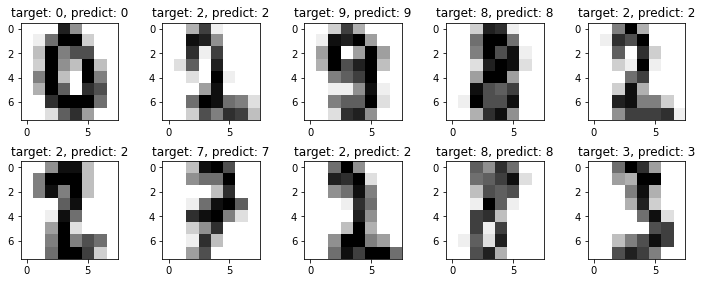

In [35]:
import matplotlib.pyplot as plt

rows, cols = 2, 5
fg, ax = plt.subplots(rows, cols, figsize=(10.0, 4.0), tight_layout=True)
for i in range(rows * cols):
    ax[i // cols][i % cols].imshow(
        test_data[i].reshape([8, 8]),
        cmap="binary",
        interpolation="nearest"
    )
    ax[i // cols][i % cols].set_title("target: %d, predict: %d"%(test_labels[i], predicted_labels[i]))

plt.show()

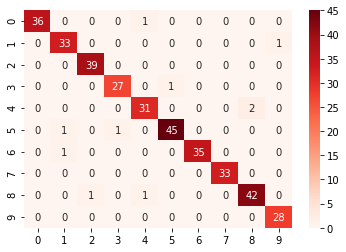

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels, predicted_labels)

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(conf_mat, annot=True, cmap="Reds")
plt.show()

In [37]:
conf_mat

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  1,  0, 45,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      0.97      0.96        34
           2       0.97      1.00      0.99        39
           3       0.96      0.96      0.96        28
           4       0.94      0.94      0.94        33
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        33
           8       0.95      0.95      0.95        44
           9       0.97      1.00      0.98        28

    accuracy                           0.97       359
   macro avg       0.97      0.97      0.97       359
weighted avg       0.97      0.97      0.97       359

